<h2 style="color:white;background-color:#3cb371">Credit card default prediction</h2>

In [1]:
#importing python module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv("credit card default.csv")

In [4]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df = df.rename(columns = {'default payment next month': 'default'})

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

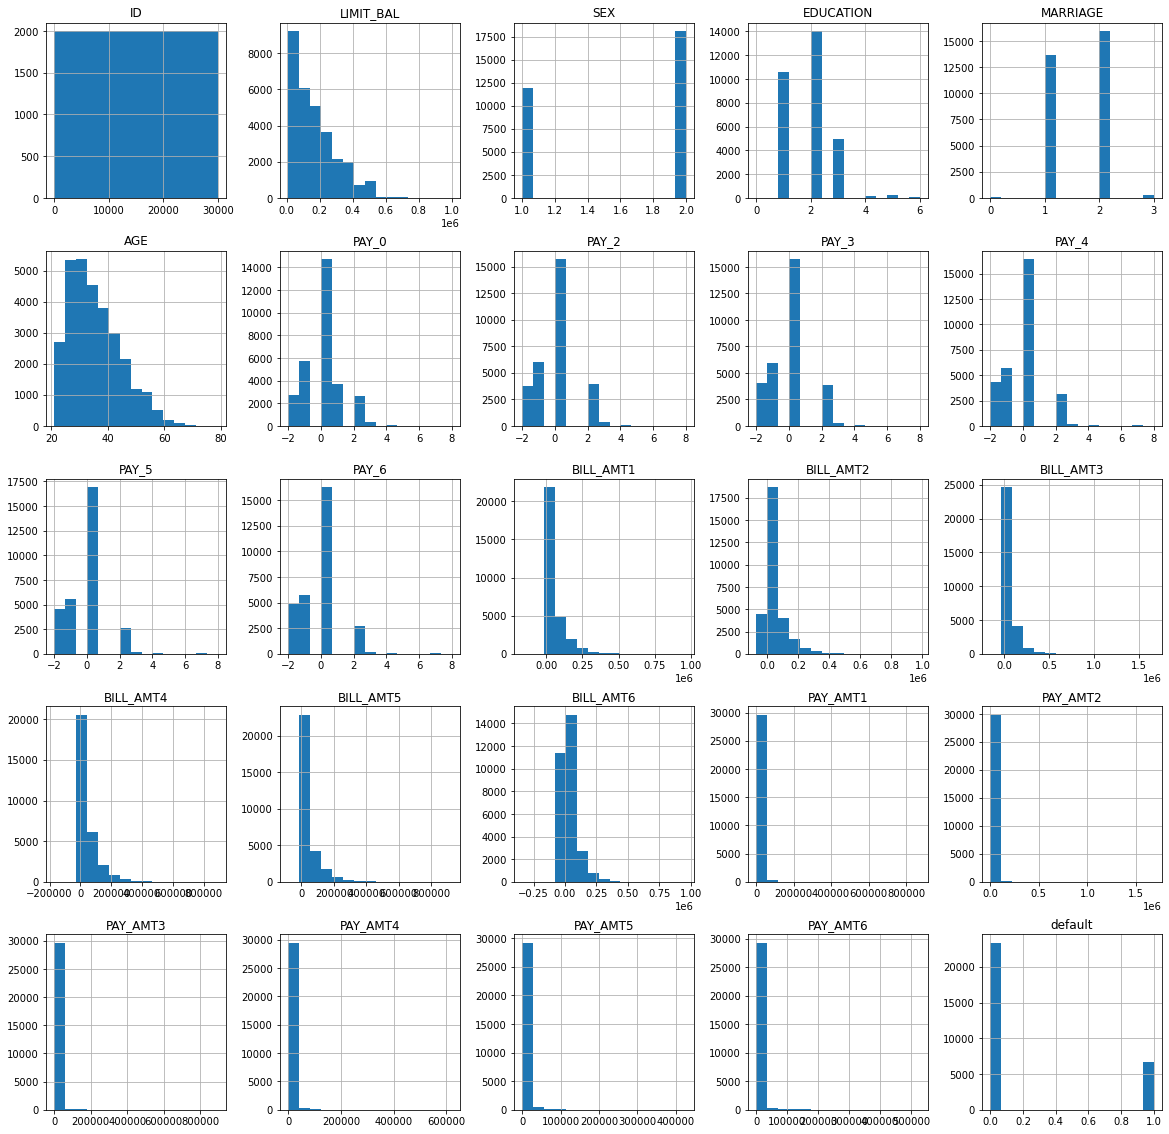

In [10]:
df.hist(bins=15, figsize=(20,20))
plt.show()

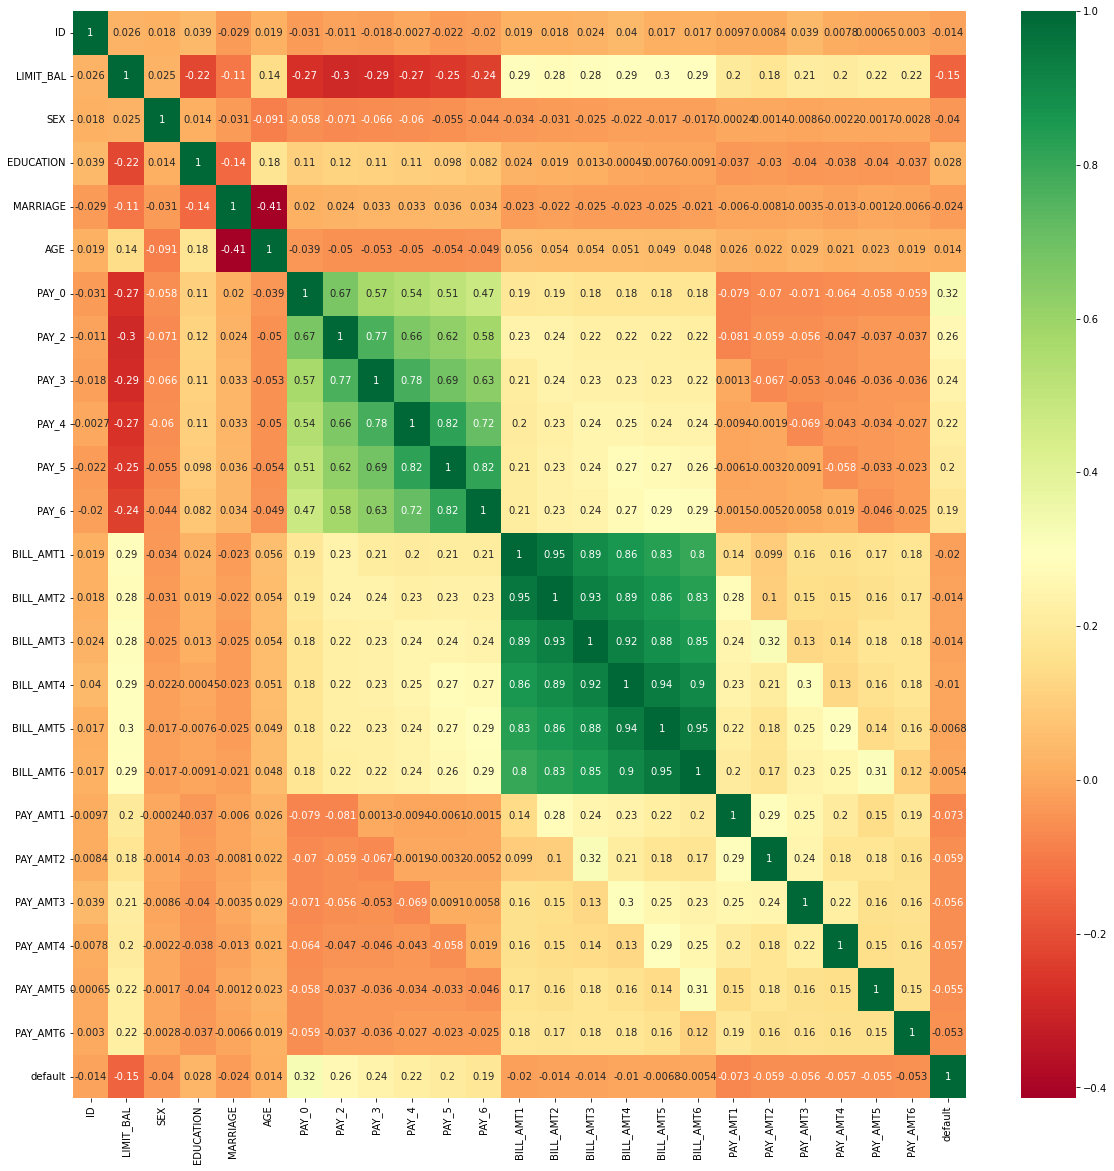

In [11]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

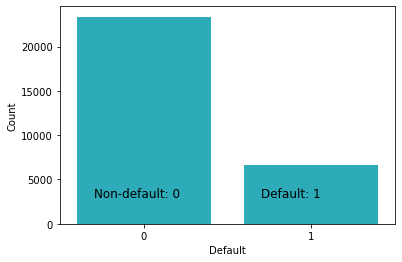

In [12]:
plt.figure()
sns.countplot(x="default", data=df, color ='tab:cyan')
plt.annotate('Non-default: {}'.format(0), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(1), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [13]:
  df = df.drop('ID', axis=1)

In [14]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [15]:
df = onehot_encode(df,{'EDUCATION': 'EDU','MARRIAGE': 'MAR'})

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [17]:
Y = df['default']
X = df.drop('default', axis=1)
    

In [18]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [19]:
Y

0        1.876378
1        1.876378
2       -0.532942
3       -0.532942
4       -0.532942
           ...   
29995   -0.532942
29996   -0.532942
29997    1.876378
29998    1.876378
29999    1.876378
Name: default, Length: 30000, dtype: float64

In [20]:
from sklearn import preprocessing
from sklearn import utils


In [21]:
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)
print(Y)

[1 1 0 ... 1 1 1]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=7)

In [23]:
X_train.shape

(24000, 32)

In [24]:
X_test.shape

(6000, 32)

In [25]:
Y_train.shape

(24000,)

In [26]:
Y_test.shape

(6000,)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_predlr = lr.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

logistic regression classification report 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4710
           1       0.68      0.25      0.36      1290

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.63      6000
weighted avg       0.79      0.81      0.78      6000



Text(377.15999999999997, 0.5, 'True_default')

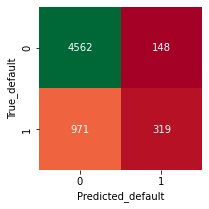

In [30]:
print("logistic regression classification report \n", classification_report(Y_test, Y_predlr))
matrix_confusion = confusion_matrix(Y_test, Y_predlr)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_predknn = knn.predict(X_test)

k nearest neighbor classification report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4710
           1       0.52      0.32      0.40      1290

    accuracy                           0.79      6000
   macro avg       0.68      0.62      0.64      6000
weighted avg       0.77      0.79      0.77      6000



Text(377.15999999999997, 0.5, 'True_default')

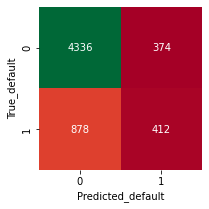

In [32]:
print("k nearest neighbor classification report \n", classification_report(Y_test, Y_predknn))
matrix_confusion = confusion_matrix(Y_test, Y_predknn)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [33]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_prednb = nb.predict(X_test)

Naive Bayes classification report 
               precision    recall  f1-score   support

           0       0.91      0.08      0.15      4710
           1       0.22      0.97      0.36      1290

    accuracy                           0.27      6000
   macro avg       0.57      0.52      0.26      6000
weighted avg       0.76      0.27      0.19      6000



Text(377.15999999999997, 0.5, 'True_default')

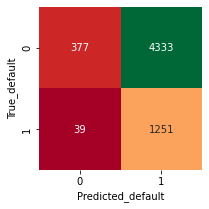

In [34]:
print("Naive Bayes classification report \n", classification_report(Y_test, Y_prednb))
matrix_confusion = confusion_matrix(Y_test, Y_prednb)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [ ]:
svm = SVC()
svm.fit(X_train,Y_train)
Y_predsvm = svm.predict(X_test)

Support Vector Machine classification report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4710
           1       0.66      0.32      0.43      1290

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



Text(377.15999999999997, 0.5, 'True_default')

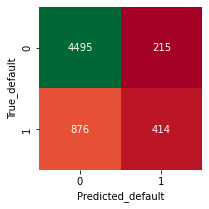

In [36]:
print("Support Vector Machine classification report \n", classification_report(Y_test, Y_predsvm))
matrix_confusion = confusion_matrix(Y_test, Y_predsvm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [37]:
rfm = RandomForestClassifier()
rfm.fit(X_train,Y_train)
Y_predrfm = rfm.predict(X_test)

Random Forest classification report 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4710
           1       0.61      0.36      0.45      1290

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



Text(377.15999999999997, 0.5, 'True_default')

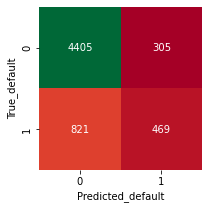

In [38]:
print("Random Forest classification report \n", classification_report(Y_test, Y_predrfm))
matrix_confusion = confusion_matrix(Y_test, Y_predrfm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [46]:
Y_test = pd.DataFrame(Y_test)

In [48]:
Y_test.value_counts()

0    4710
1    1290
dtype: int64

In [39]:
data = {
	"calories" : [420, "hi", 390],
    "duration" : [50, 40, 45]
}

In [67]:
classification_data = {
                       "classication algorithm": [ "LogisticRegression", "KNeighborsClassifier", "GaussianNB", "SVC", "RandomForestClassifier"],
                       "accuracy": [0.81, 0.79, 0.27, 0.82, 0.81],
                       " weighted avg precision": [0.79, 0.77, 0.76, 0.80, 0.79],
                       "weighted avg reacall": [0.81, 0.79, 0.27, 0.82, 0.81],
                       " f-1 score": [0.78, 0.77, 0.19, 0.79, 0.79],
                      }

In [68]:
classification_data = pd.DataFrame(classification_data)
classification_data

,classication algorithm,accuracy,weighted avg precision,weighted avg reacall,f-1 score
0,LogisticRegression,0.81,0.79,0.81,0.78
1,KNeighborsClassifier,0.79,0.77,0.79,0.77
2,GaussianNB,0.27,0.76,0.27,0.19
3,SVC,0.82,0.80,0.82,0.79
4,RandomForestClassifier,0.81,0.79,0.81,0.79
